<a href="https://colab.research.google.com/github/KDVVRPavani/appl_final_project/blob/main/appl_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aim: To identify the factors leading people to depression

# **Depression**

 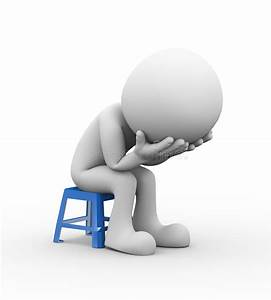

# Introduction

Depression is a common illness worldwide, with an estimated 3.8% of the population affected, including 5.0% among adults and 5.7% among adults older than 60 years.
Approximately 280 million people in the world have depression.
Depression is different from usual mood fluctuations and short-lived emotional responses to challenges in everyday life.
Depression can lead to suicide.
Over 7,00,000 people die due to suicide every year.
Suicide due to is the fourth leading cause of death in 15-29-year-olds.


In this project we have collected the dataset which deals with the details of depressed people.

Here,we considered various factors of a person like their age,martial status,sex,their income,their savings,number of children they have etc for a detailed analysis

# Importing Libraries

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import missingno as missing
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import random
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score ,auc, plot_roc_curve
from sklearn import svm
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Ignoring Warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [ ]:
df = pd.read_csv("b_depressed.csv")
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


# Info of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

# Descibing the dataset

In [ ]:
df.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


# Exploratory Data Analysis

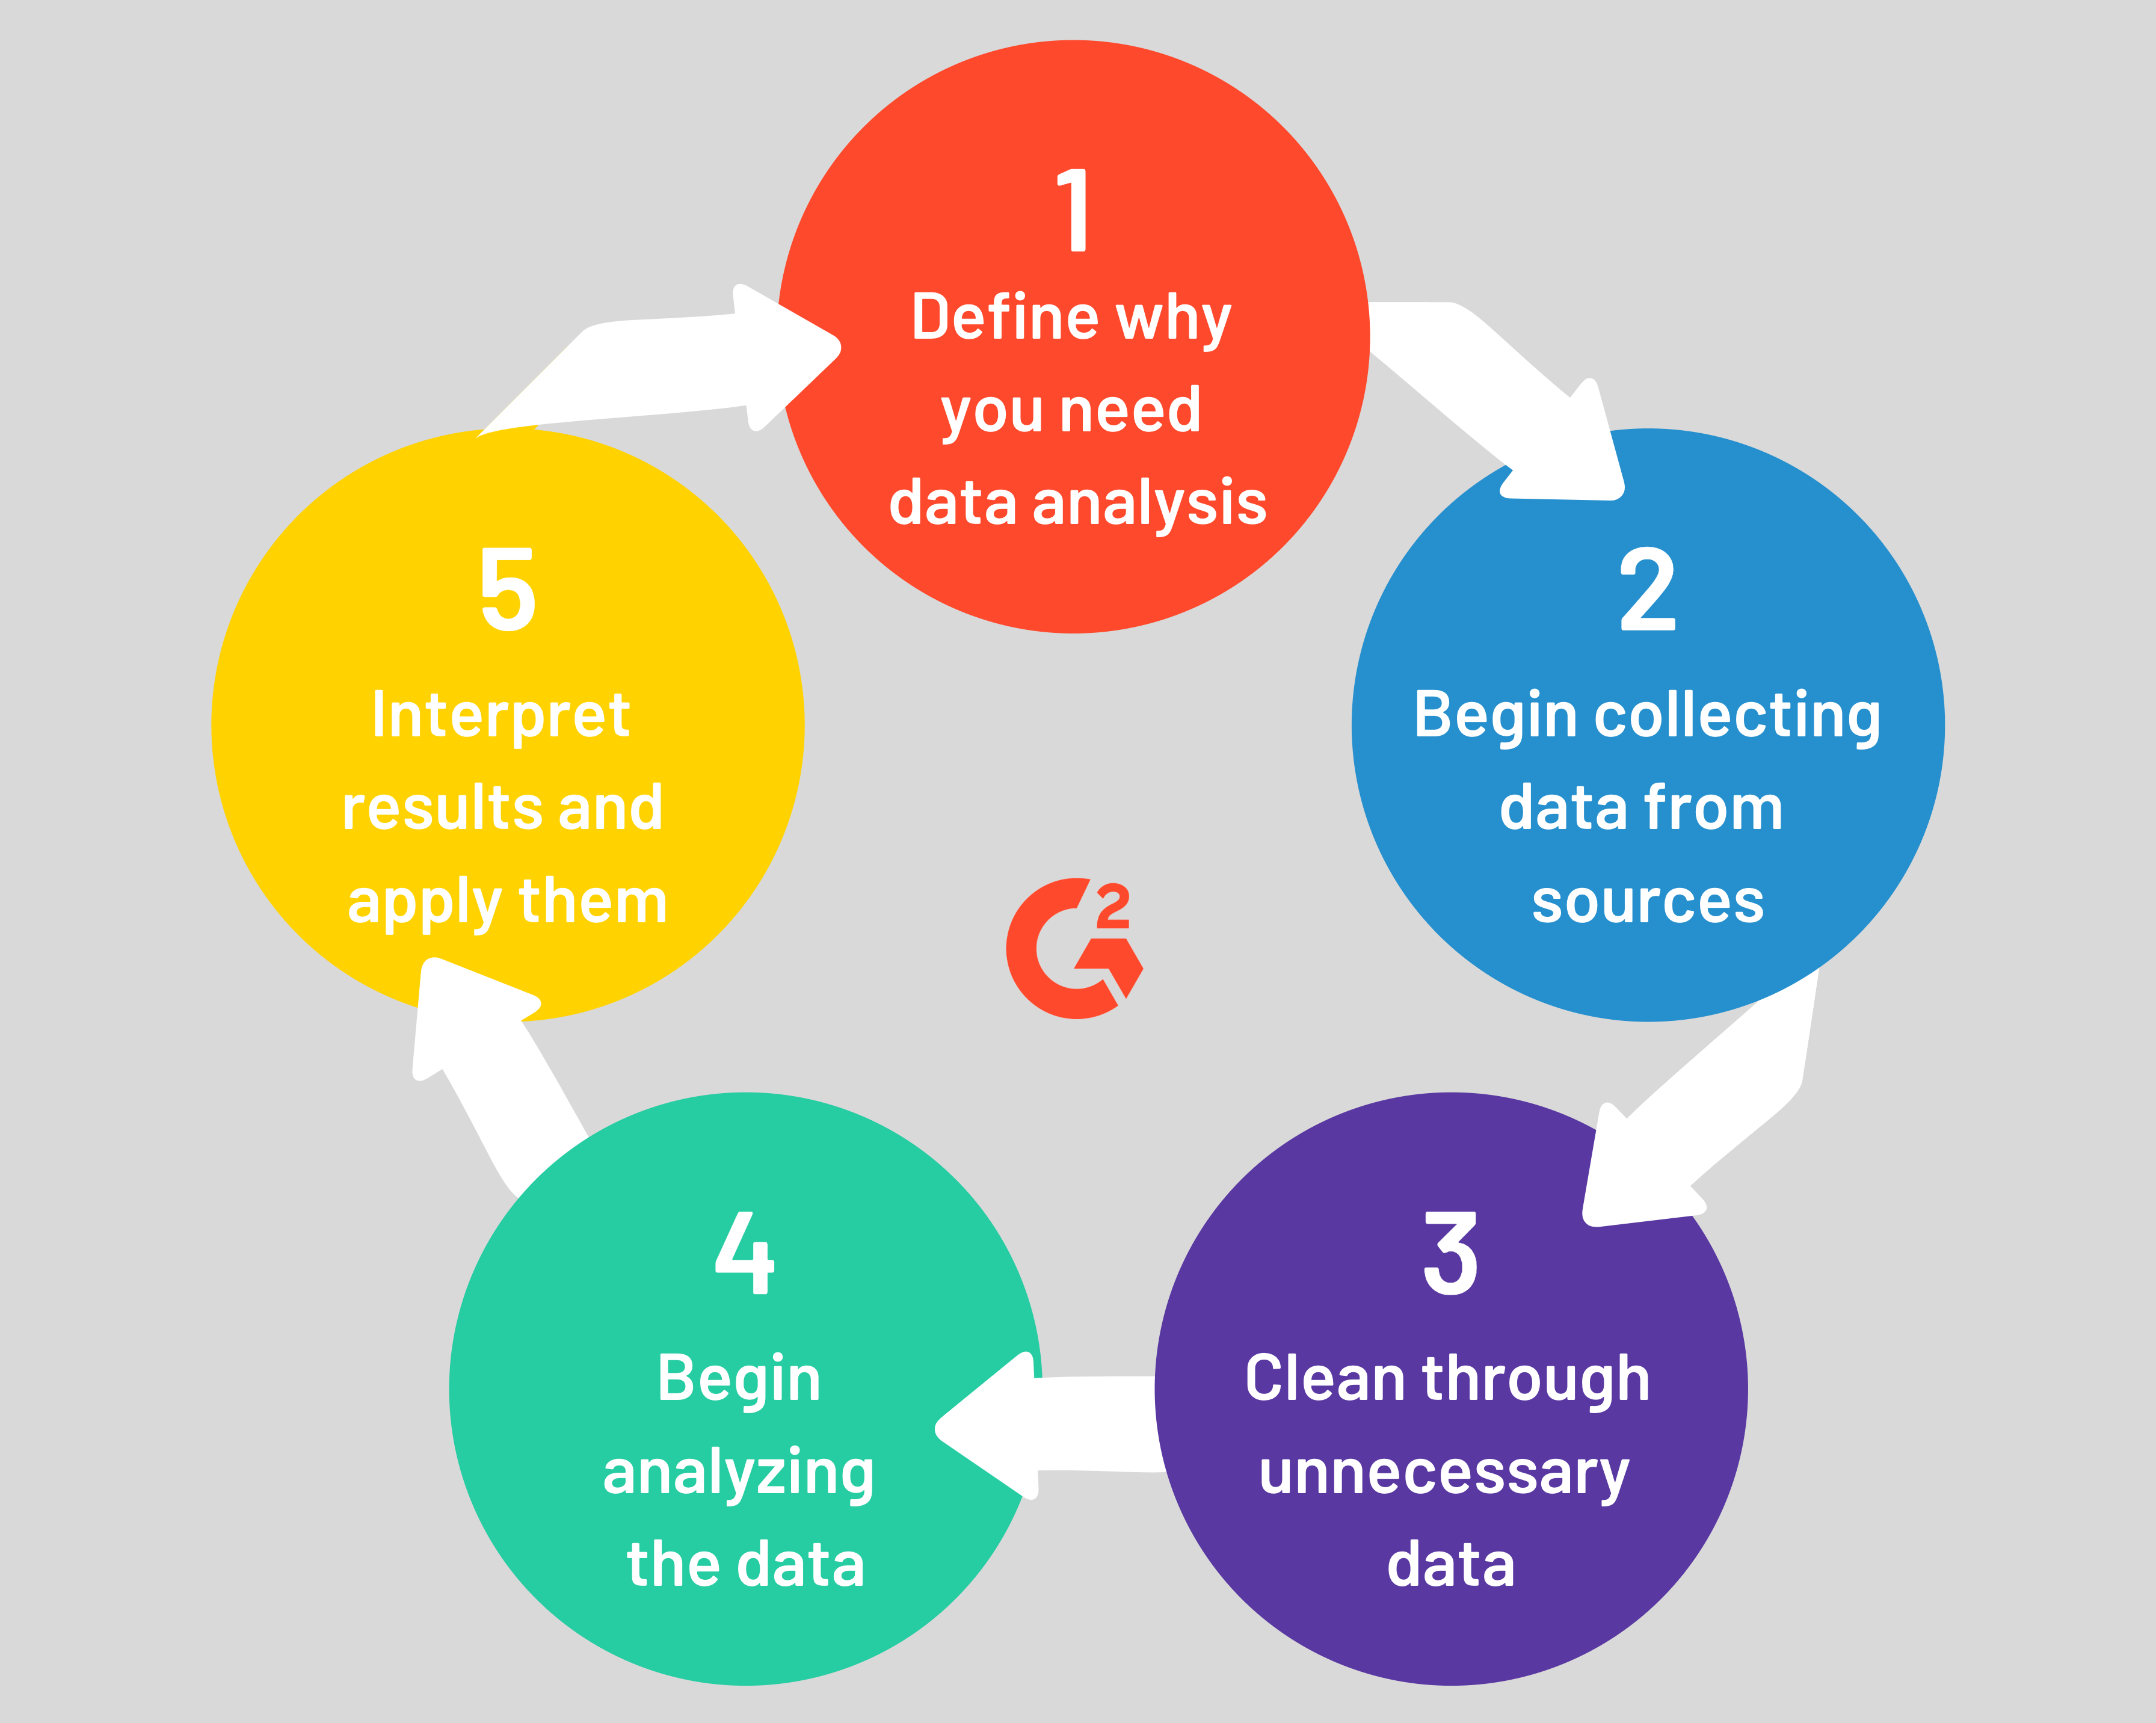# Exploratory Data Analysis

# Subplots

<AxesSubplot:xlabel='no_lasting_investmen', ylabel='Density'>

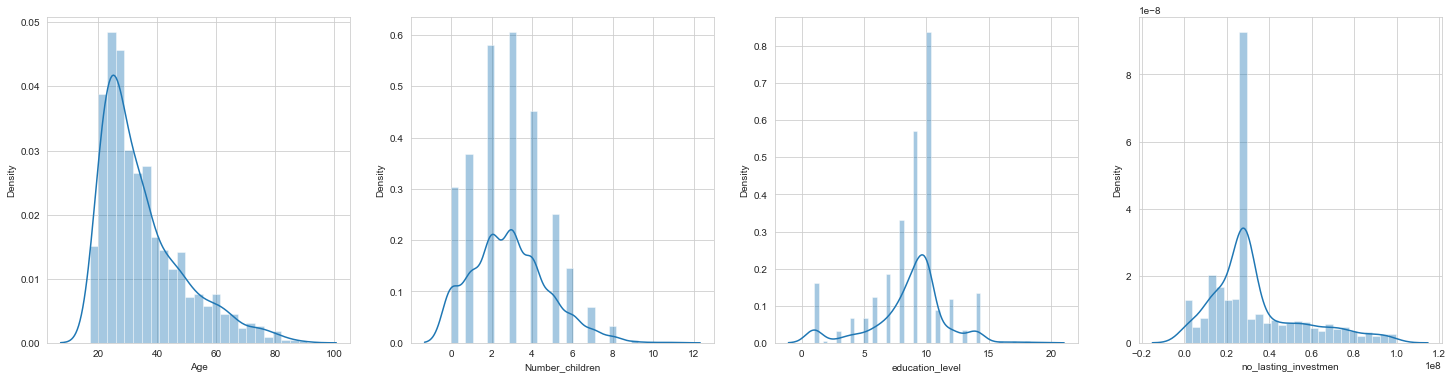

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1,4,1)
sns.distplot(df['Age'])

plt.subplot(1,4,2)
sns.distplot(df['Number_children'])

plt.subplot(1,4,3)
sns.distplot(df['education_level'])

plt.subplot(1,4,4)
sns.distplot(df['no_lasting_investmen'])

<AxesSubplot:xlabel='durable_asset', ylabel='Density'>

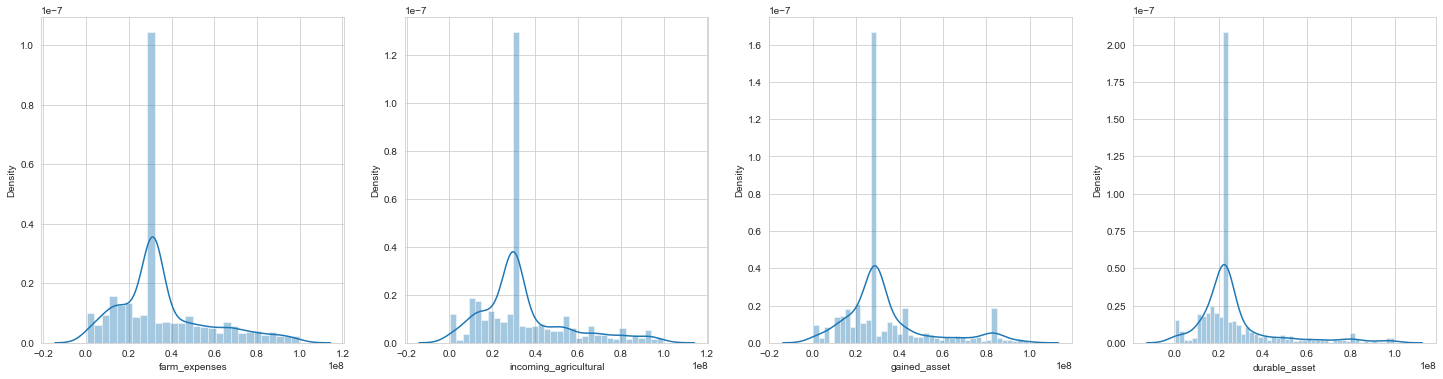

In [ ]:
plt.figure(figsize=(25,6))
plt.subplot(1,4,1)
sns.distplot(df['farm_expenses'])

plt.subplot(1,4,2)
sns.distplot(df['incoming_agricultural'])

plt.subplot(1,4,3)
sns.distplot(df['gained_asset'])

plt.subplot(1,4,4)
sns.distplot(df['durable_asset'])

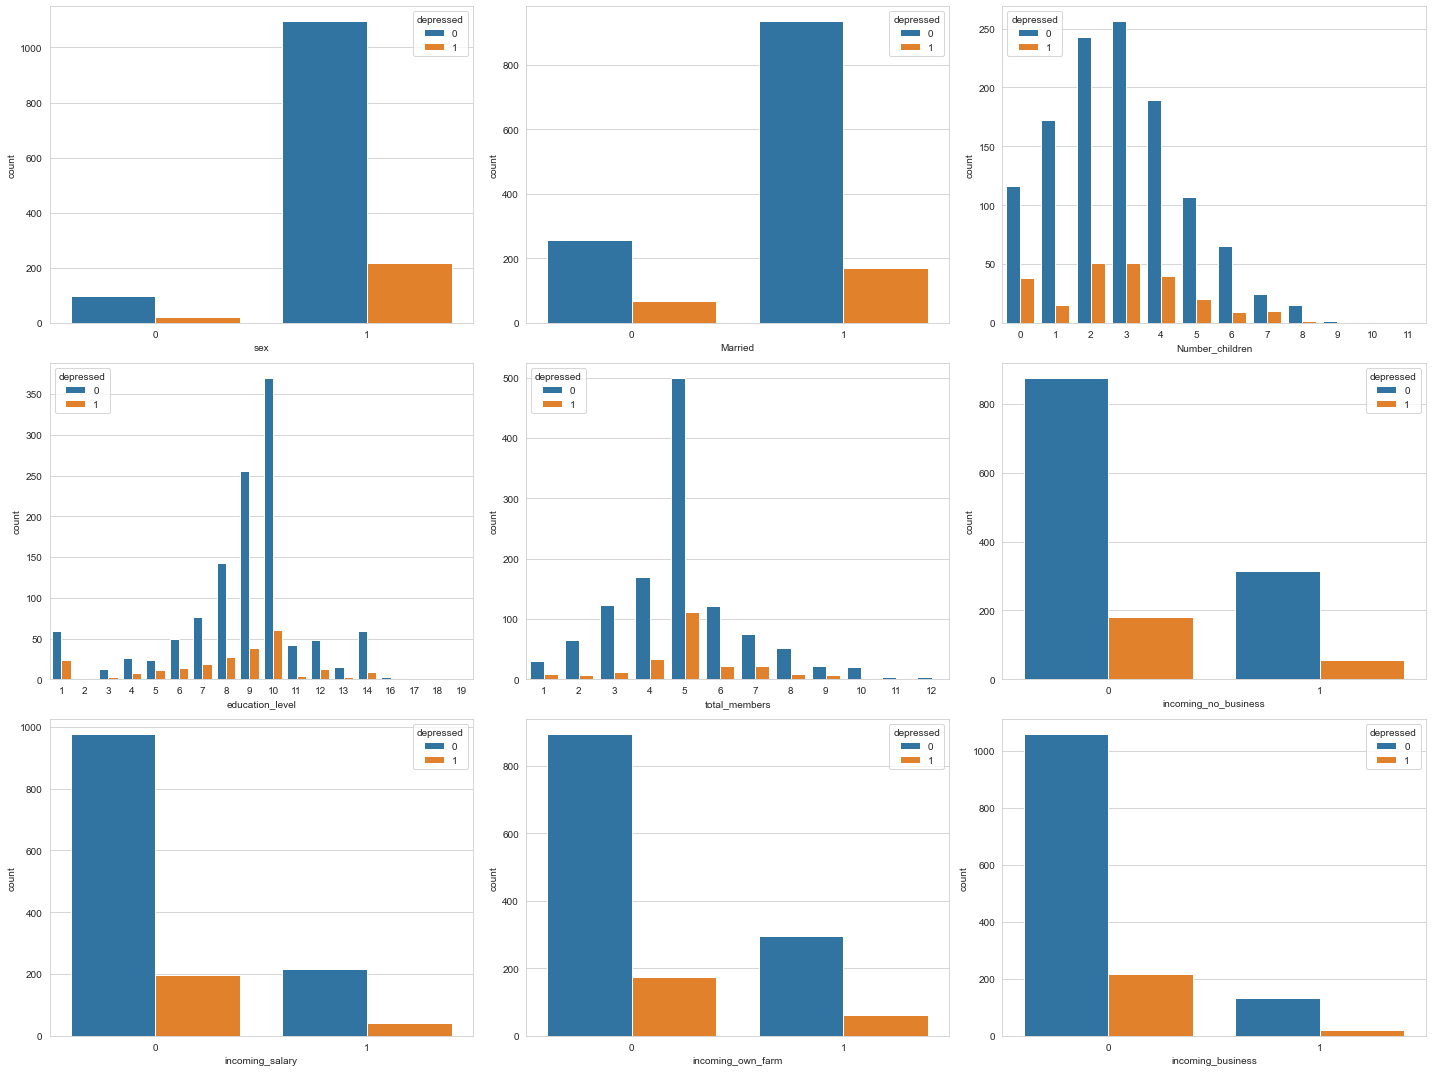

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='sex', hue='depressed', data=df)
plt.subplot(3,3,2)
sns.countplot(x='Married', hue='depressed', data=df)
plt.subplot(3,3,3)
sns.countplot(x='Number_children', hue='depressed', data=df)

plt.subplot(3,3,4)
sns.countplot(x='education_level', hue='depressed', data=df)
plt.subplot(3,3,5)
sns.countplot(x='total_members', hue='depressed', data=df)
plt.subplot(3,3,6)
sns.countplot(x='incoming_no_business', hue='depressed', data=df)

plt.subplot(3,3,7)
sns.countplot(x='incoming_salary', hue='depressed', data=df)
plt.subplot(3,3,8)
sns.countplot(x='incoming_own_farm', hue='depressed', data=df)
plt.subplot(3,3,9)
sns.countplot(x='incoming_business', hue='depressed', data=df)

plt.tight_layout()
plt.show()

# Pairplots

<Figure size 1800x432 with 0 Axes>

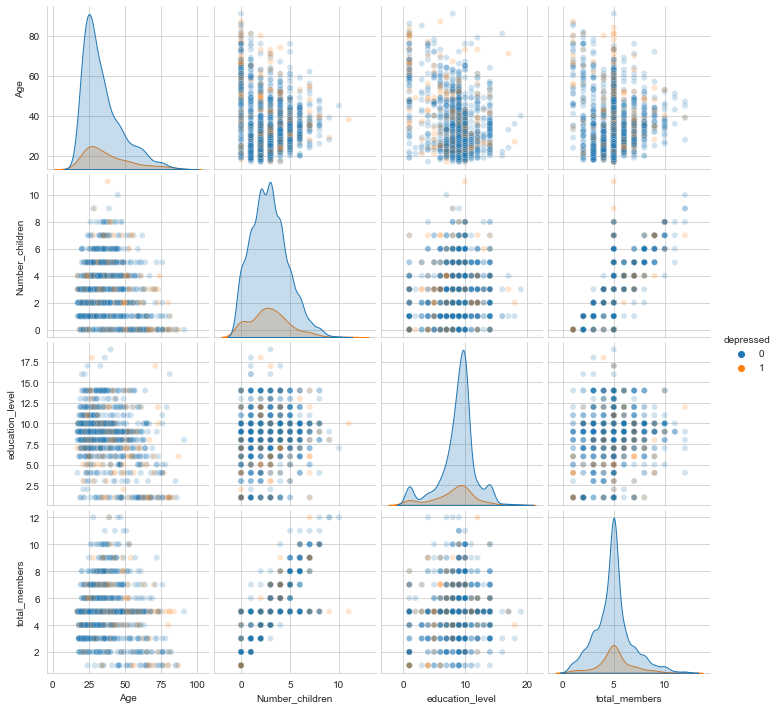

In [ ]:
dfPairplot = df.drop(['Survey_id' , 'Married' , 'Ville_id' , 'sex'  , 'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

<Figure size 1800x432 with 0 Axes>

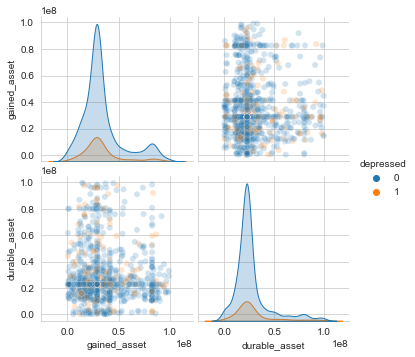

In [ ]:
dfPairplot = df.drop(['save_asset','Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 'total_members' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business' , 'incoming_agricultural' , 'farm_expenses' , 'labor_primary' , 'lasting_investment' , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

<Figure size 1800x432 with 0 Axes>

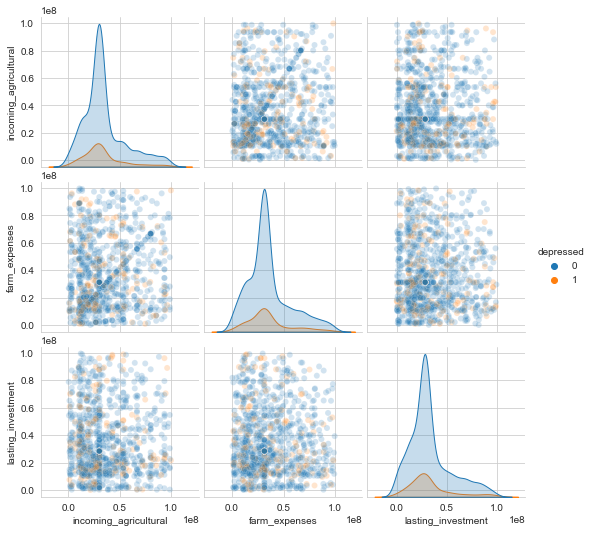

In [ ]:
dfPairplot = df.drop(['Survey_id' , 'Ville_id' , 'sex' , 'Age' , 'Married' , 'Number_children' , 'education_level' , 'total_members' , 'gained_asset' , 'durable_asset' , 'save_asset' , 'living_expenses' , 'other_expenses' , 'incoming_salary' , 'incoming_own_farm' , 'incoming_business' , 'incoming_no_business'  , 'labor_primary'     , 'no_lasting_investmen'], axis=1)
dfPairplot.head()
plt.figure(figsize=(25,6))
sns.pairplot(data=dfPairplot,hue='depressed',plot_kws={'alpha':0.2})
plt.show()

# Depicting  Depression with respect to Age

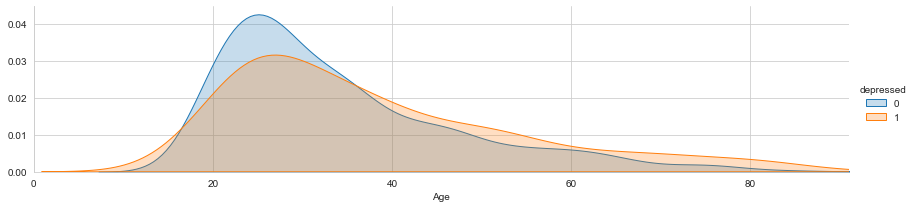

In [ ]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0,df['Age'].max()))
facet.add_legend()

plt.show()

#  Depicting  Depression with respect to Gained_asset

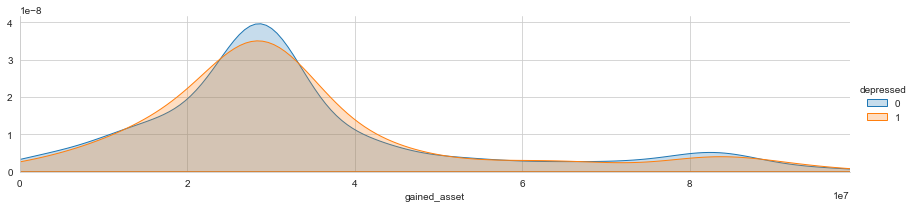

In [ ]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'gained_asset', shade=True)
facet.set(xlim=(0,df['gained_asset'].max()))
facet.add_legend()

plt.show()

# Depicting  Depression with respect to Durable assest

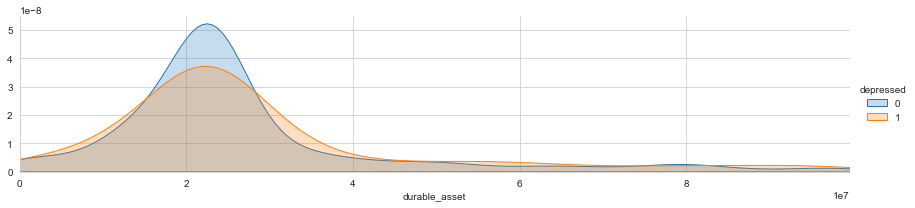

In [ ]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'durable_asset', shade=True)
facet.set(xlim=(0,df['durable_asset'].max()))
facet.add_legend()

plt.show()

#  Depicting  Depression with respect to Agricultural income

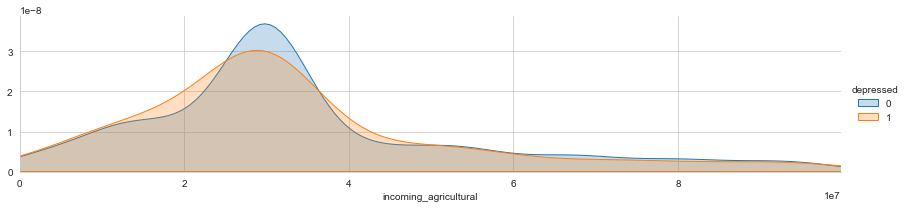

In [ ]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'incoming_agricultural', shade=True)
facet.set(xlim=(0,df['incoming_agricultural'].max()))
facet.add_legend()

plt.show()

#  Depicting  Depression with respect to Farm expenses

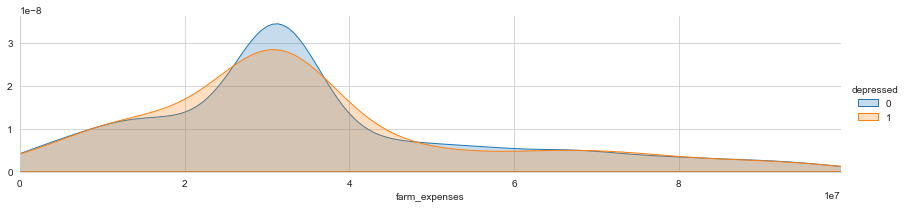

In [ ]:
facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'farm_expenses', shade=True)
facet.set(xlim=(0,df['farm_expenses'].max()))
facet.add_legend()

plt.show()

# Depicting  Depression with respect to Lasting investment

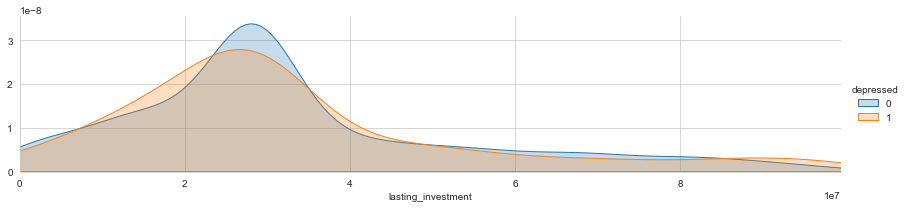

In [ ]:

facet = sns.FacetGrid(df,hue="depressed", aspect=4)
facet.map(sns.kdeplot, 'lasting_investment', shade=True)
facet.set(xlim=(0,df['lasting_investment'].max()))
facet.add_legend()

plt.show()

In [ ]:
dfCorr = df.drop(['no_lasting_investmen'], axis=1)


# Heatmaps

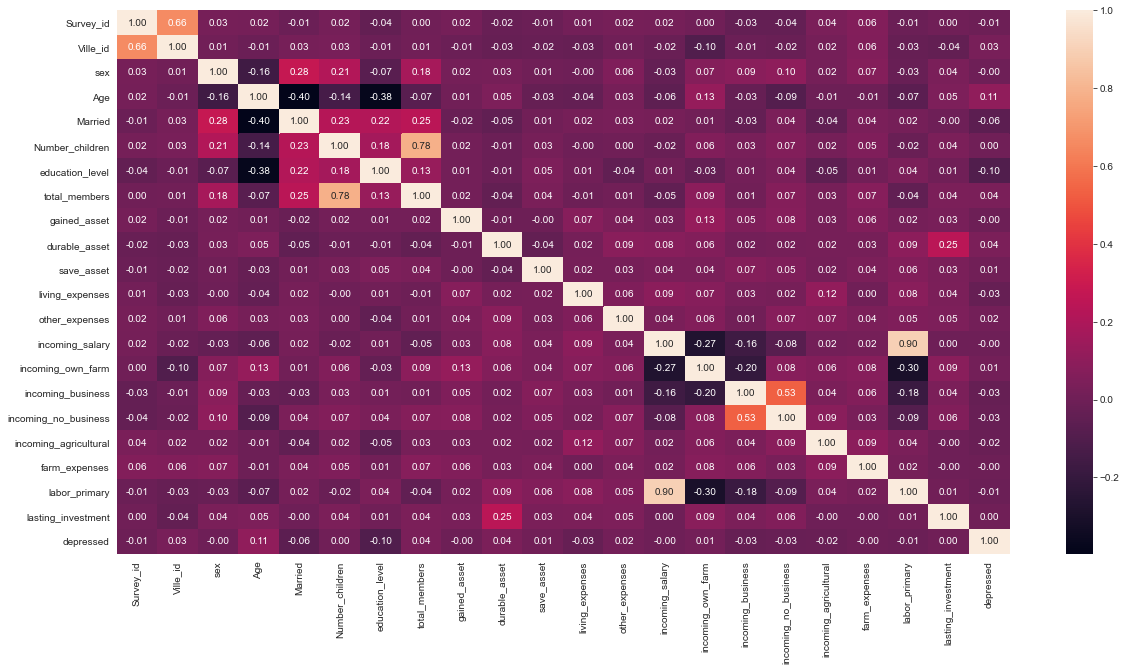

In [ ]:
plt.subplots(figsize=(20,10)) 
sns.heatmap(dfCorr.corr(), annot = True, fmt = ".2f")
plt.show()

# Dropping unnecessary columns

In [ ]:
dfDrop = df.drop(['no_lasting_investmen', 'Survey_id', 'Ville_id', 'gained_asset', 'durable_asset', 'save_asset', 'farm_expenses', 'labor_primary', 'Number_children','lasting_investment','incoming_agricultural'], axis=1)

# Correlation Matrix

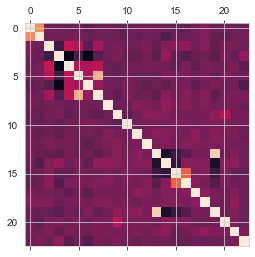

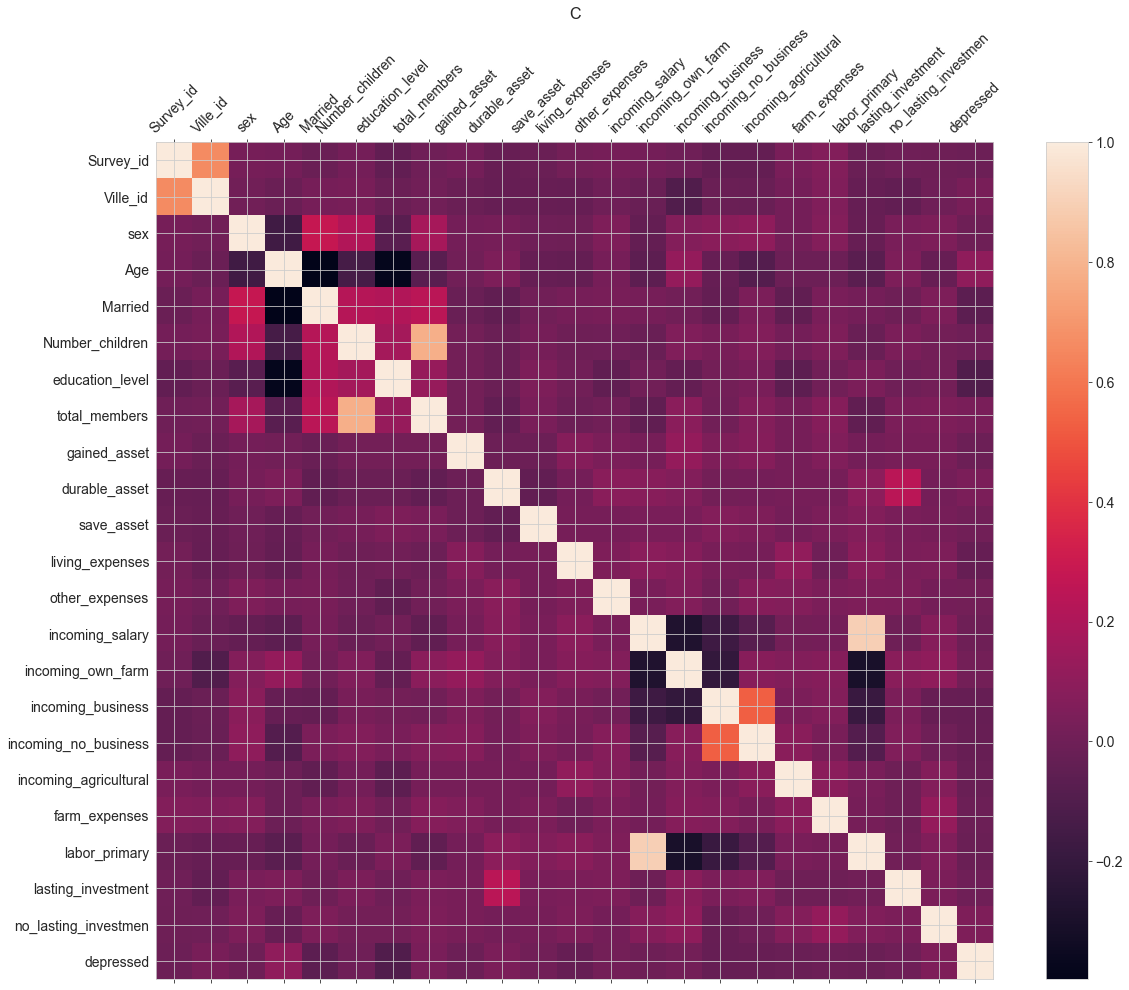

In [ ]:
plt.matshow(df.corr())
plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('C',fontsize=16);

# Understanding curves

In [ ]:
def plotLearningCurves(X_train, y_train, classifier, title):
    train_sizes, train_scores, test_scores = learning_curve(
            classifier, X_train, y_train, cv=5, scoring="accuracy")
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b" ,label="Training Error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r" ,label="Cross Validation Error")
    
    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Data Size', fontsize = 14)
    plt.ylabel('Error', fontsize = 14)
    plt.tight_layout()

# Validation curves

In [ ]:
def plotValidationCurves(X_train, y_train, classifier, param_name, param_range, title):
    train_scores, test_scores = validation_curve(
        classifier, X_train, y_train, param_name = param_name, param_range = param_range,
        cv=5, scoring="accuracy")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.plot(param_range, train_scores_mean, 'o-', color="b" ,label="Training Error")
    plt.plot(param_range, test_scores_mean, 'o-', color="r" ,label="Cross Validation Error")

    plt.legend()
    plt.grid()
    plt.title(title, fontsize = 18, y = 1.03)
    plt.xlabel('Complexity', fontsize = 14)
    plt.ylabel('Error', fontsize = 14)
    plt.tight_layout()

In [ ]:
X = dfDrop.iloc[:, :-1].values
y = dfDrop.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
rf = RandomForestClassifier(n_estimators = 9,max_depth=3,min_samples_split=9,min_samples_leaf=5)
rf.fit(X_train, y_train)
rf_pred1 = rf.predict(X_test)

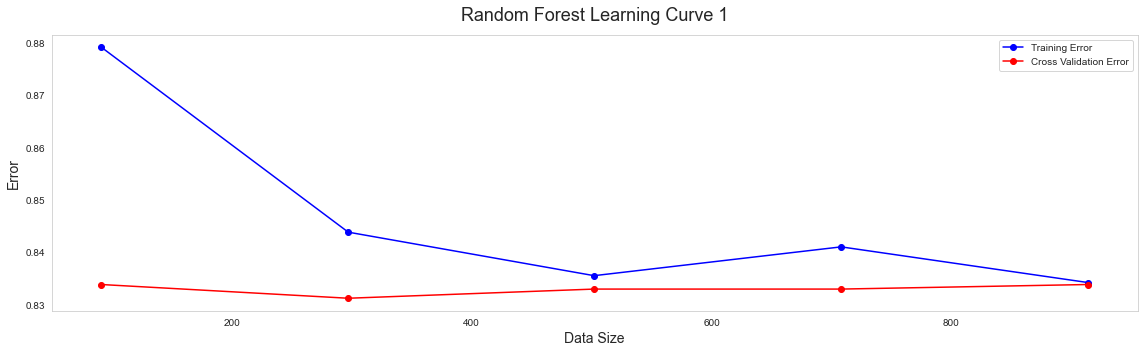

In [ ]:

plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 1'
plotLearningCurves(X_train, y_train, rf, title)

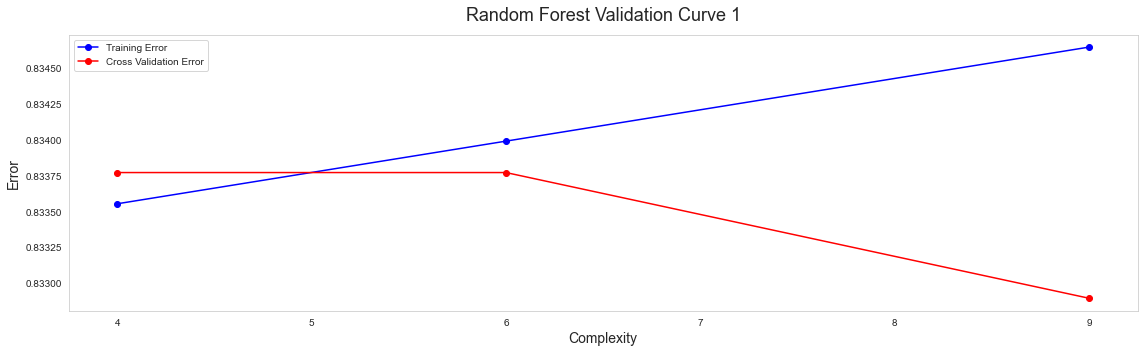

In [ ]:
title = 'Random Forest Validation Curve 1'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf_pred1)

array([[238,   0],
       [ 48,   0]], dtype=int64)

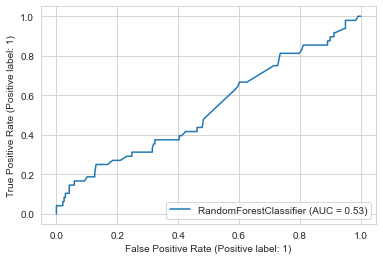

In [ ]:

plot_roc_curve(rf, X_test, y_test)
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators = 9,max_depth=3,criterion='entropy',min_samples_split=9,min_samples_leaf=5)
rf.fit(X_train, y_train)
rf_pred2 = rf.predict(X_test)

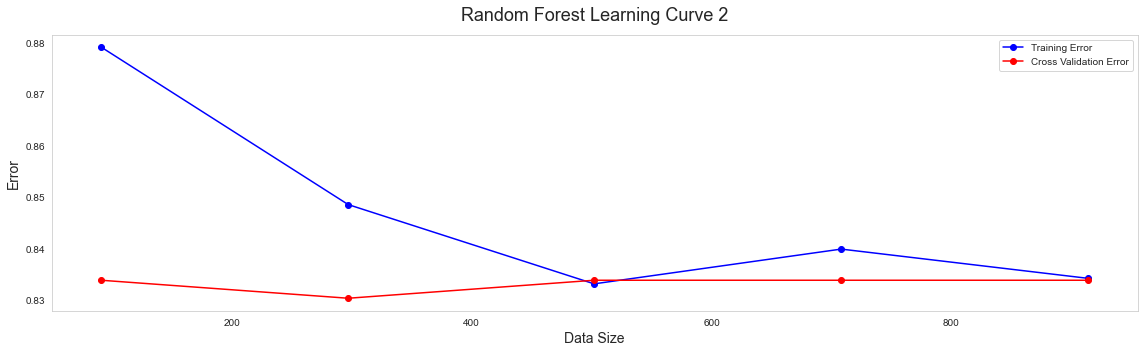

In [ ]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 2'
plotLearningCurves(X_train, y_train, rf, title)

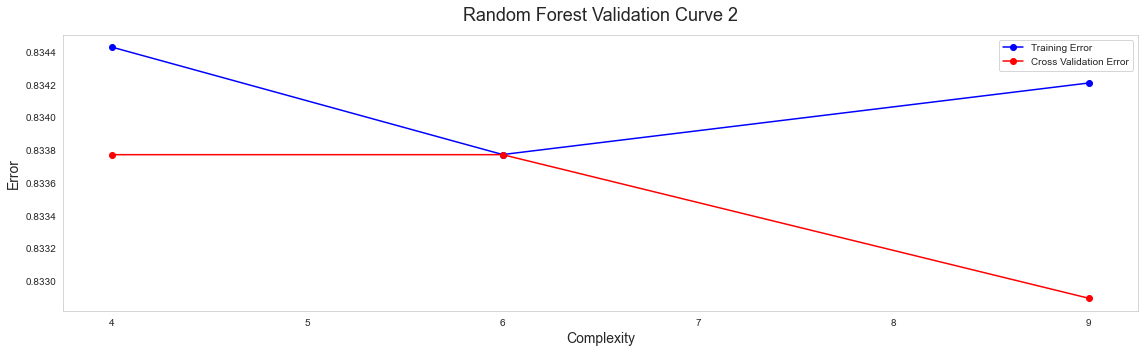

In [ ]:
plt.figure(figsize = (16,5))
title = 'Random Forest Validation Curve 2'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

In [ ]:
confusion_matrix(y_test, rf_pred2)

array([[238,   0],
       [ 48,   0]], dtype=int64)

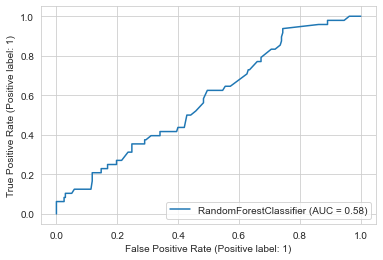

In [ ]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators = 9,max_depth=3,criterion='entropy',min_samples_split=10,min_samples_leaf=5)
rf.fit(X_train, y_train)
rf_pred3 = rf.predict(X_test)

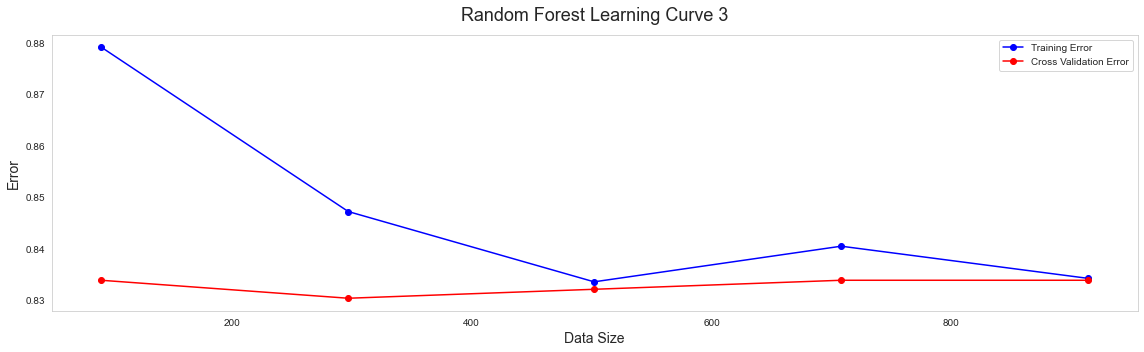

In [ ]:
plt.figure(figsize = (16,5))
title = 'Random Forest Learning Curve 3'
plotLearningCurves(X_train, y_train, rf, title)

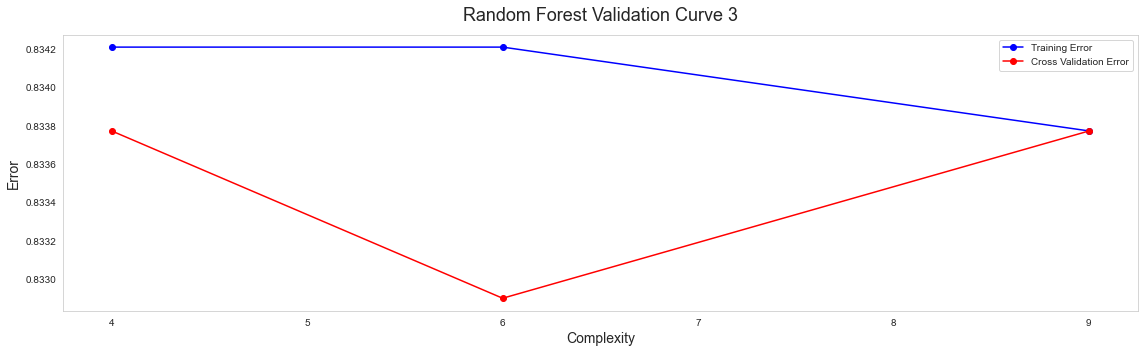

In [ ]:
title = 'Random Forest Validation Curve 3'
param_name = 'n_estimators'
param_range = [4, 6, 9]
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, rf, param_name, param_range, title)

In [ ]:
confusion_matrix(y_test, rf_pred3)

array([[238,   0],
       [ 48,   0]], dtype=int64)

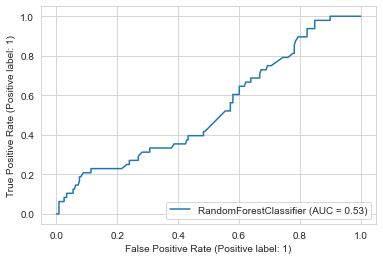

In [ ]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

In [ ]:
Classifier = RandomForestClassifier()
grid_obj = GridSearchCV(Classifier,
                        {'n_estimators': [4, 6, 9],
                         'max_features': ['log2', 'sqrt','auto'],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 5, 8],
                         'min_samples_split': [2, 5, 8, 10],
                         'min_samples_leaf': [1, 3, 5]
                        },
                        scoring=make_scorer(accuracy_score))
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Classifier = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
Classifier.fit(X_train, y_train)

predictions = Classifier.predict(X_test)

print("Best Params: " , grid_obj.best_estimator_)
print("Best Score: " , grid_obj.best_score_)


Best Params:  RandomForestClassifier(max_depth=3, max_features='log2', min_samples_leaf=3,
                       min_samples_split=8, n_estimators=4)
Best Score:  0.8355167394468704


In [ ]:
X = dfDrop.iloc[:, :-1].values
y = dfDrop.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred1=knn.predict(X_test)

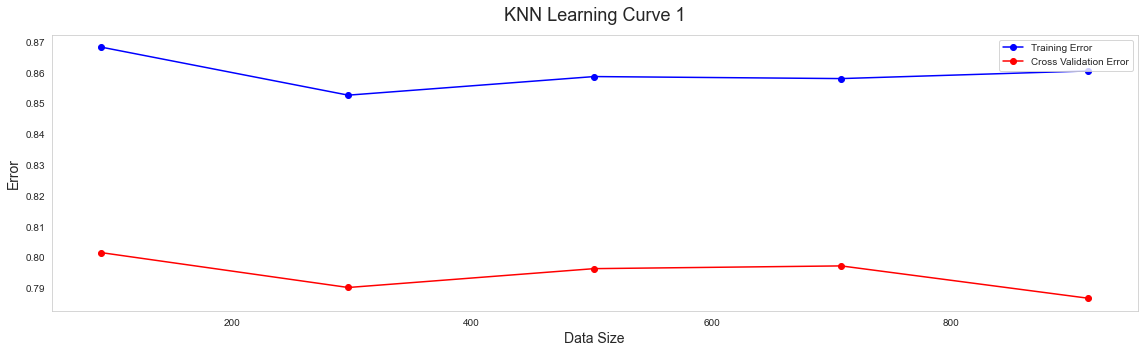

In [ ]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 1'
plotLearningCurves(X_train,y_train,knn,title)

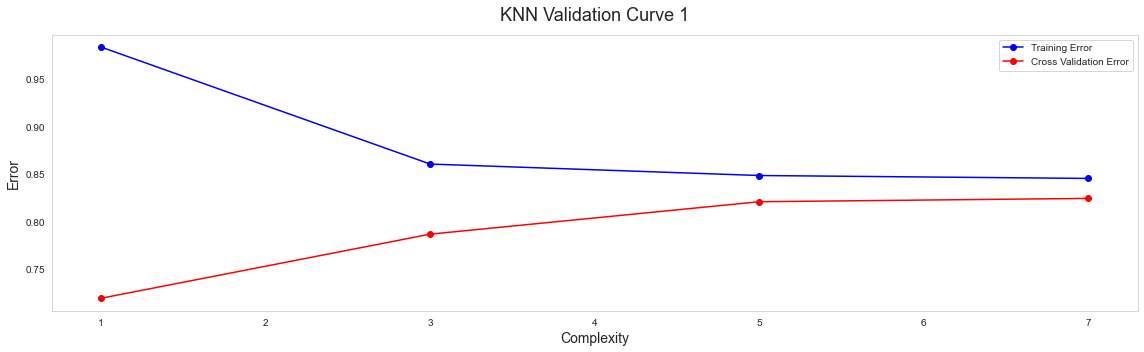

In [ ]:
title = 'KNN Validation Curve 1' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [ ]:
confusion_matrix(y_test, knn_pred1)

array([[218,  14],
       [ 51,   3]], dtype=int64)

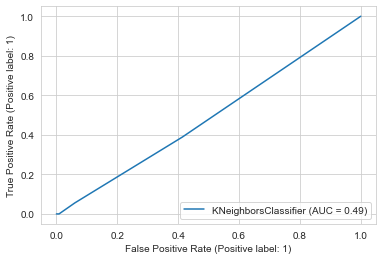

In [ ]:
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [ ]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=7)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred2=knn.predict(X_test)

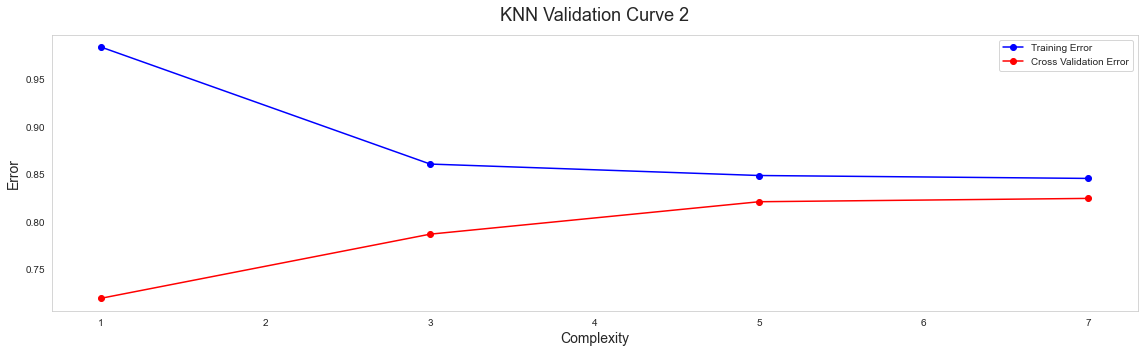

In [ ]:
title = 'KNN Validation Curve 2' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [ ]:
confusion_matrix(y_test, knn_pred2)

array([[226,   6],
       [ 53,   1]], dtype=int64)

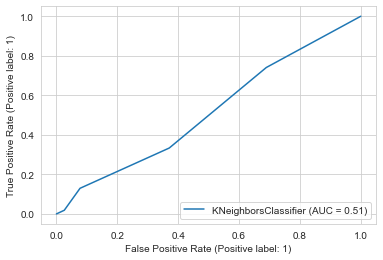

In [ ]:

plot_roc_curve(knn, X_test, y_test)
plt.show()

In [ ]:
# Create KNN classifier
knn=KNeighborsClassifier(n_neighbors=10)
# Fit the classifier to the data
knn.fit(X_train,y_train)
#show first 5 model predictions on the test data
knn_pred3=knn.predict(X_test)

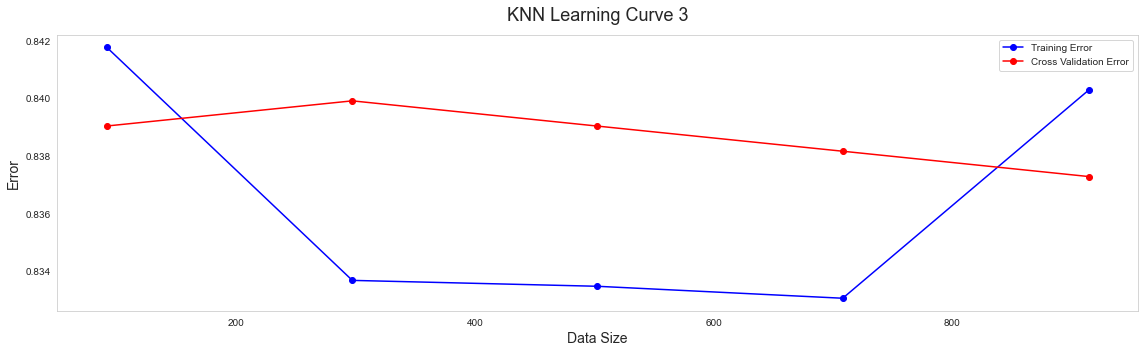

In [ ]:
plt.figure(figsize=(16,5))
title='KNN Learning Curve 3'
plotLearningCurves(X_train,y_train,knn,title)

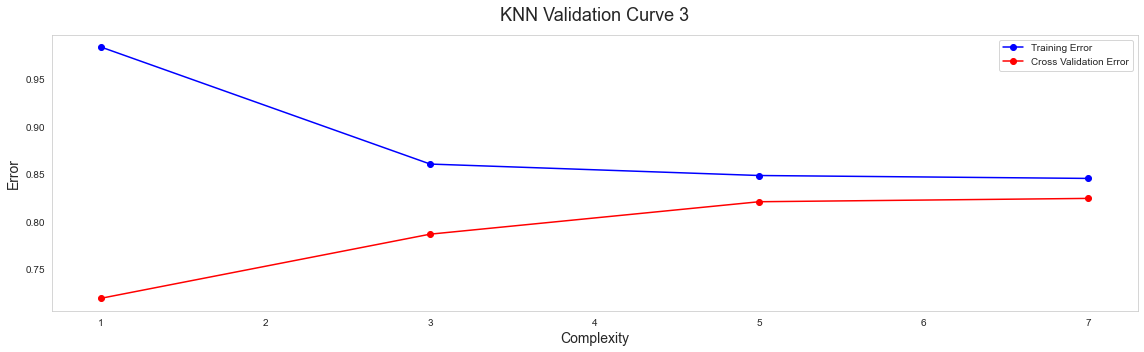

In [ ]:
title = 'KNN Validation Curve 3' 
param_name = 'n_neighbors'
param_range = np.arange(1,9,2)
plt.figure(figsize = (16,5))
plotValidationCurves(X_train, y_train, knn, param_name, param_range, title)

In [ ]:
confusion_matrix(y_test, knn_pred3)

array([[232,   0],
       [ 53,   1]], dtype=int64)

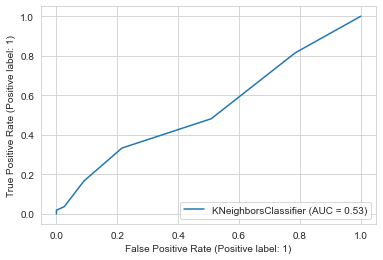

In [ ]:

plot_roc_curve(knn, X_test, y_test)
plt.show()

## Conclusion:

There are many steps in a proper exploratory data analysis (EDA). Depending on your familiarity with your data and the complexity of the data and the problem you are solving the scale of the EDA necessary may change. Generally, the exploratory analysis can be broken down into three main steps:



Data Sourcing

Data Cleaning

Data Visualization

# Machine Learning:

Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.

# Decision Tree:

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

# K Nearest Neighbour:


K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique

K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.